# Datenvisualisierung mit

![Matplotlib](https://raw.githubusercontent.com/matplotlib/matplotlib/0b5940f544c5715220a9f3d57c971d3fc4073b64/doc/_static/logo2.svg)

Um mit Matplotlib arbeiten zu können, muss die Bibliothek erst einmal importiert werden. 
Damit wir nicht so viel tippen müssen, geben wir ihr den kürzeren Namen `plt`.

In [1]:
from IPython.display import Image

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 8)
plt.rcParams["font.size"] = 16
plt.rcParams["lines.linewidth"] = 2

Außerdem brauchen wir der Einfachheit halber ein paar Funktionen aus `numpy`, die dir schon bekannt vorkommen sollten.

In [2]:
import numpy as np

x = np.linspace(0, 1)  # gibt 50 Zahlen in gleichmäßigem Abstand von 0–1

Zu erst ein einfaches Beispiel mit $f(x)=x^2$.
Um den Text-Output in diesem Notebook zu unterdrücken, schreiben wir manchmal ein `;` hinter die letzte Zeile.

Im Folgenden verwenden wir die objekt-orientierte Schreibweise von `matplotlib`, die mehr Möglichkeiten und Freiheiten bietet.
Diese rufst du mit

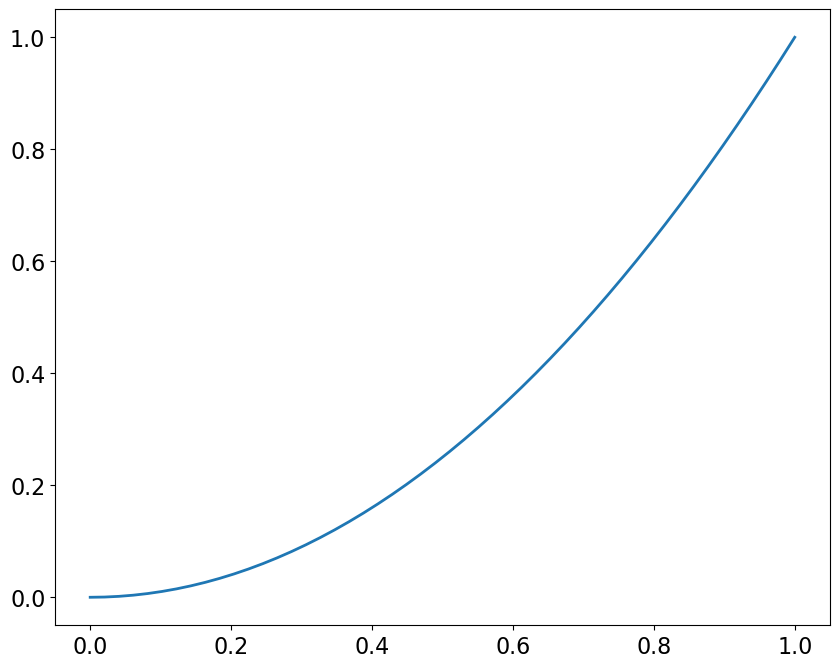

In [3]:
fig, ax = plt.subplots()

ax.plot(x, x**2);

auf.
Du hast dann ein Objekt figure `fig` und ein Objekt axes `ax`, mit denen du interagieren und die Einstellungen im plot vornehmen kannst.

Das Objekt `figure` ist dabei die gesamte Abbildung, auf der sich Axen, labels und Text befinden können.
Die einzelnen `axes` Objekte sind die jeweiligen Koordinatensysteme, in die man die entsprechenden Daten plottet.
Mit diesen können auch Informationen über die Einheiten und Darstellung mit den Achsen definiert werden.

Anderes Beispiel: $\sin(t)$ mit verschiedenen Stilen. Vorsicht, die Funktionen und $\pi$ sind Bestandteil von `numpy`.

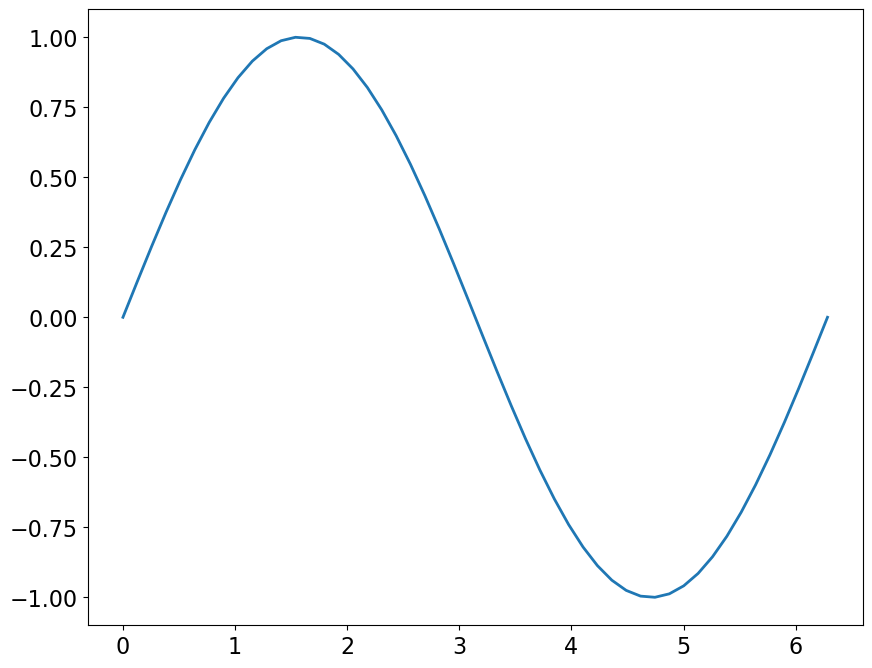

In [4]:
t = np.linspace(0, 2 * np.pi)

fig, ax = plt.subplots()
ax.plot(t, np.sin(t));

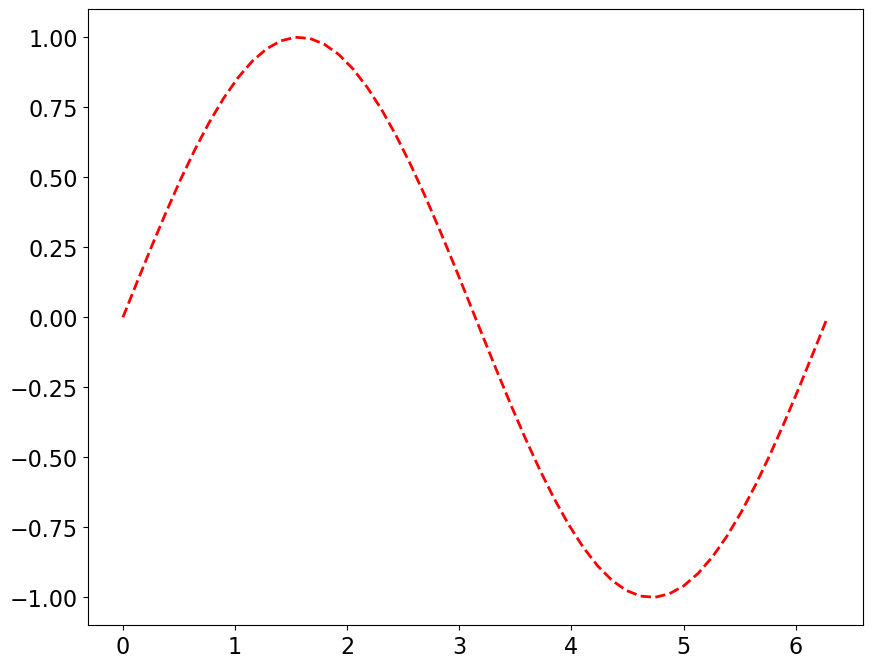

In [5]:
fig2, ax2 = plt.subplots()
ax2.plot(t, np.sin(t), "r--");

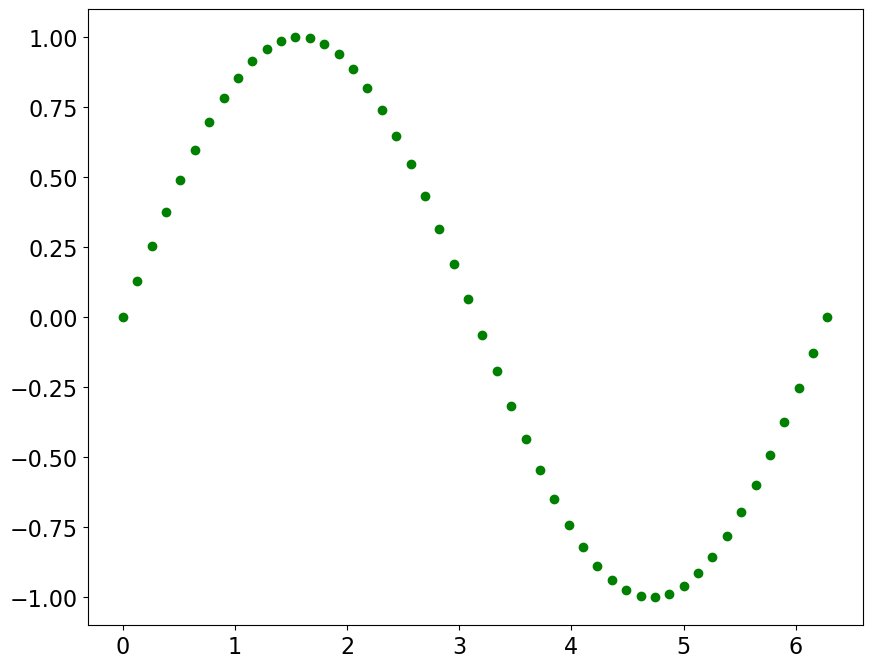

In [6]:
ax.cla()
ax.plot(t, np.sin(t), "go")
fig

Tabelle mit einigen Farben und Stilen: [matplotlib.axes.Axes.plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html)

Tabellen mit allen Farben und Stilen:
- [Marker](https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html#sphx-glr-gallery-lines-bars-and-markers-marker-reference-py)
- [Linienstile](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html#sphx-glr-gallery-lines-bars-and-markers-linestyles-py)
- [Farben](https://matplotlib.org/stable/gallery/color/named_colors.html)

Der Vorteil ist nun, dass du z.B. mehrere Objekte `fig` und `ax` parallel benutzen und nachträglich wieder auf das vorherige zugreifen kannst.

Du kannst so auch im Nachhinein noch Dinge verändern und trotzdem die andere `figure` unverändert lassen.

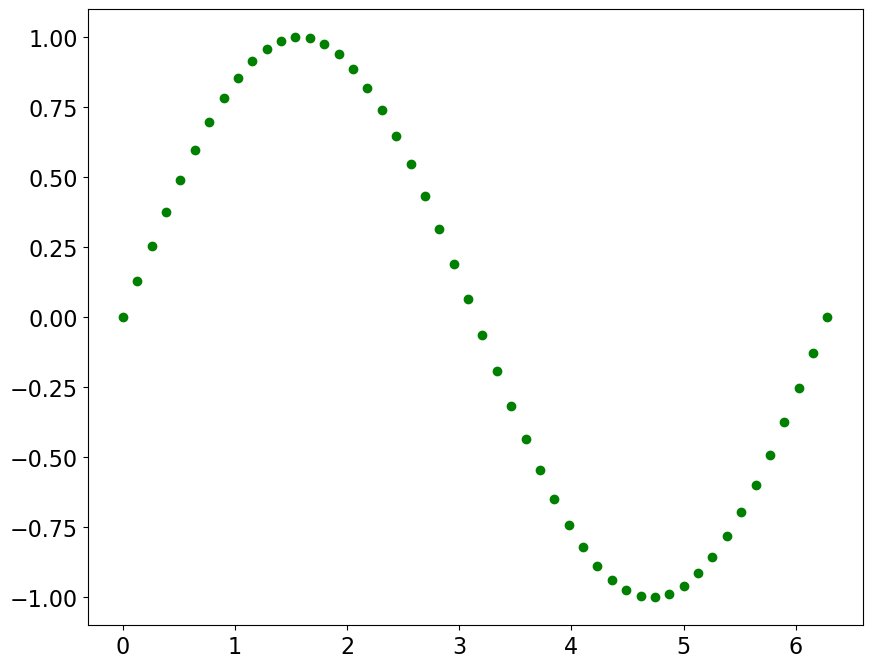

In [7]:
fig

Neue Grenzen mit `set_xlim(a, b)` und `set_ylim(a, b)`

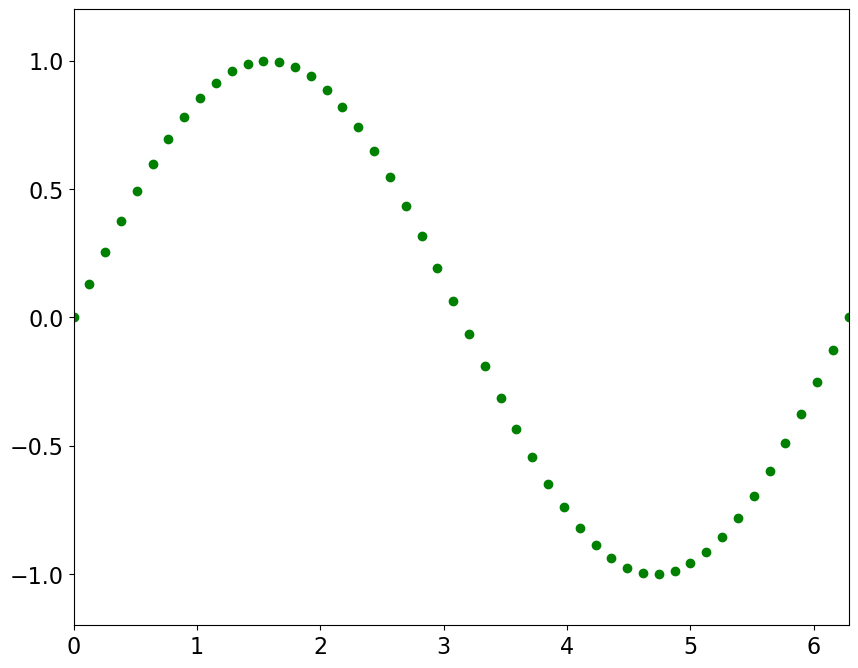

In [8]:
ax.set_xlim(0, 2 * np.pi)
ax.set_ylim(-1.2, 1.2)
fig

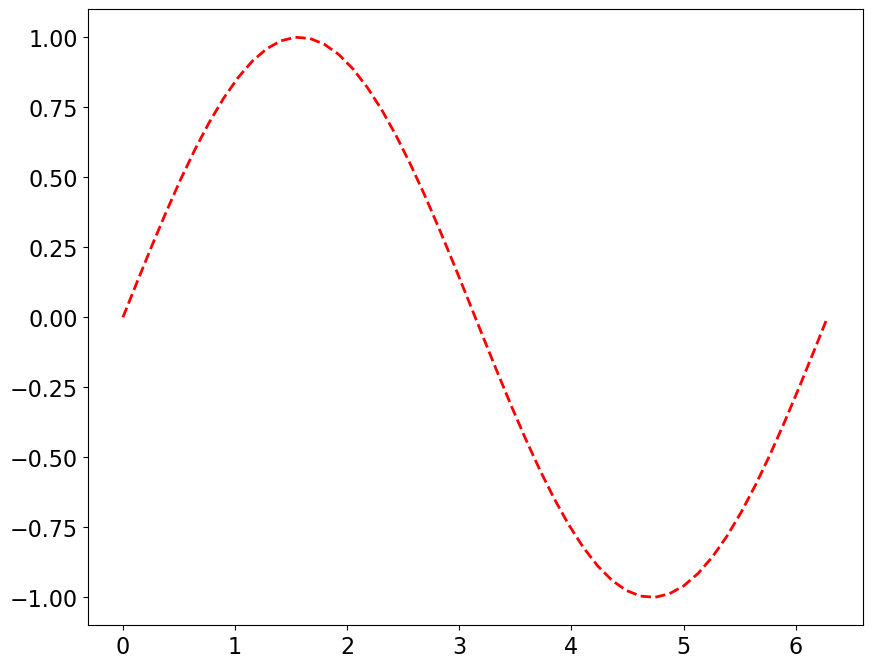

In [9]:
fig2

## Es fehlt noch etwas...

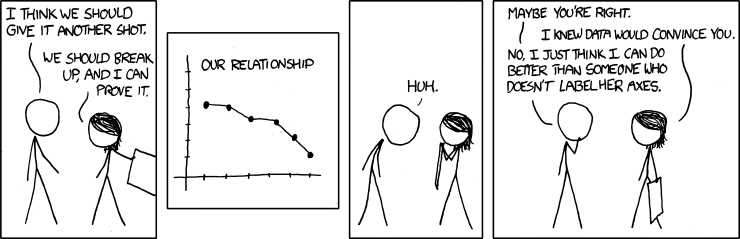

In [10]:
# https://imgs.xkcd.com/comics/convincing.png
Image(filename="images/xkcd-convincing.png")

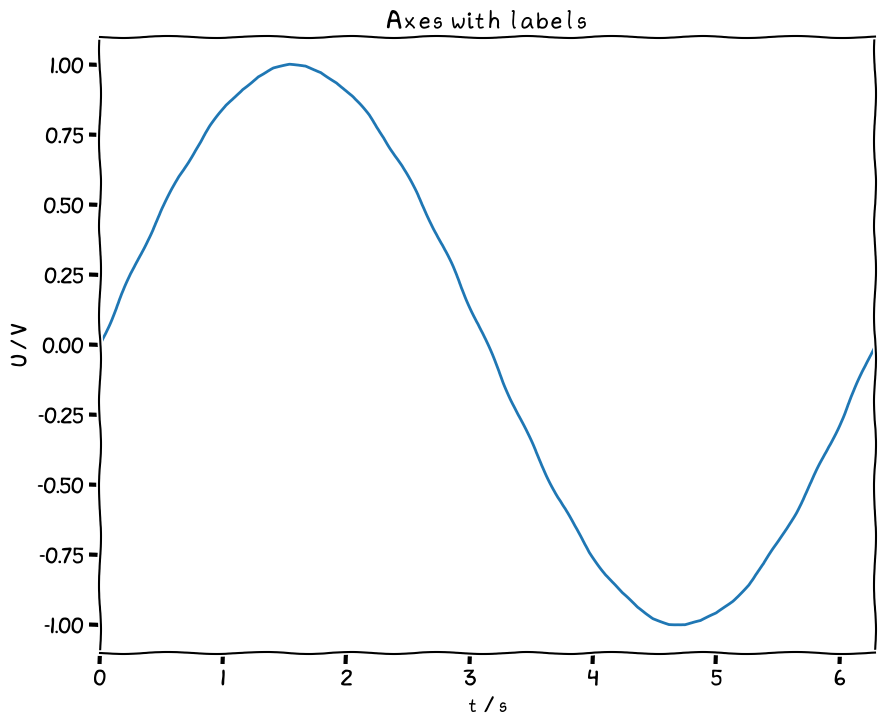

In [11]:
with plt.xkcd():
    fig, ax = plt.subplots()
    
    ax.set_title("Axes with labels")
    ax.plot(t, np.sin(t))
    ax.set_xlabel("t / s")
    ax.set_ylabel("U / V")
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(0, 2 * np.pi);

## Einheiten in Achsenbeschriftungen werden wegdividiert:

Achsen-Beschriftungen können mit LaTeX-Code erstellt werden → LaTeX-Kurs in der nächsten Woche.

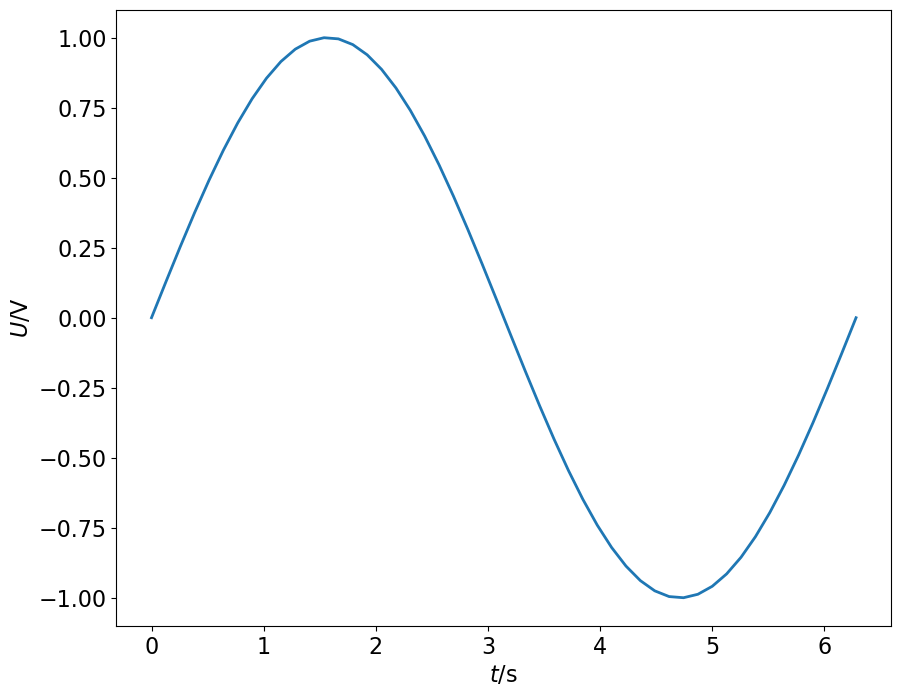

In [12]:
fig, ax = plt.subplots()

ax.plot(t, np.sin(t))
ax.set_xlabel(r"$t / \mathrm{s}$")
ax.set_ylabel(r"$U / \mathrm{V}$");

# ax.plot(t, np.sin(t))
# ax.set_xlabel(r'$t / \mathrm{s}$')
# ax.set_ylabel(r'$U \,/\, \mathrm{V}$');  # Spaces sind Geschmacksfrage

Mehr zu Einheiten gibt es im LaTeX-Kurs.

Als eine alternative Schreibweise für die verschiedenen settings der `axes` kann man auch

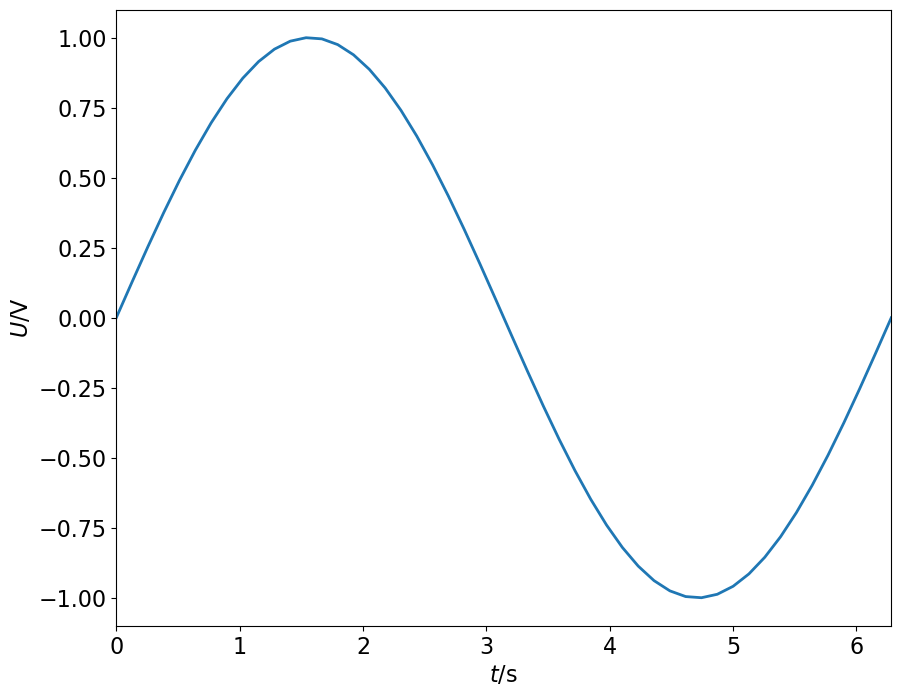

In [13]:
ax.set(
    xlim=(0, 2 * np.pi),
    xlabel=r"$t / \mathrm{s}$",
    ylabel=r"$U / \mathrm{V}$",
)
fig

verwenden.
Dabei können alle notwendigen Optionen der `axes` dann gebündelt hingeschrieben werden, was in der Übersichtlichkeit helfen kann.

## Legende

Legenden für Objekte die ein `label` tragen

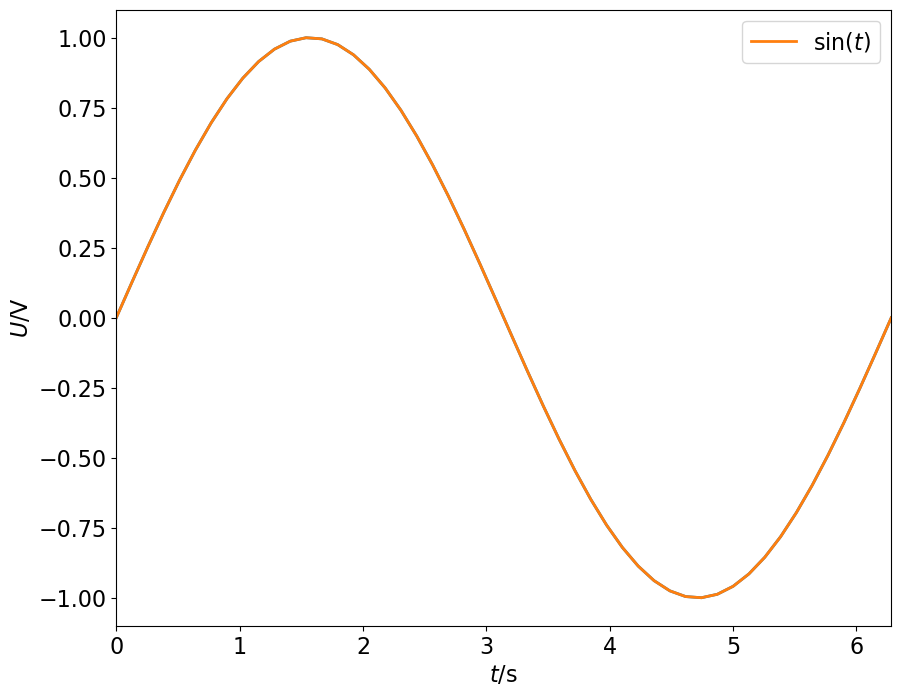

In [14]:
ax.plot(t, np.sin(t), label=r"$\sin(t)$")
ax.legend()
# ax.legend(loc="lower left")
# ax.legend(loc="best")
fig

# fig.legend()  # kann helfen, wenn man mehr als eine Achse und Platz für die Beschriftung an der Außenseite hat
# fig

Seit matplotlib 2.0.2 ist `loc=best` standardmäßig eingestellt.

Andere möglche Orte für die Legende findest du [in der Dokumentation](https://matplotlib.org/stable/api/legend_api.html).

### Gitter

Mit `grid()` wird ein Gitter erstellt:

Hier wird auch der Vorteil der objekt-orientierten Schreibweise deutlich. Wir müssen keinen neuen plot erstellen, sondern können dem in `fig` hinterlegten neue Eigenschaften hinzufügen.
Andere möglche Orte für die Legende findest du hier:
https://matplotlib.org/api/legend_api.html.

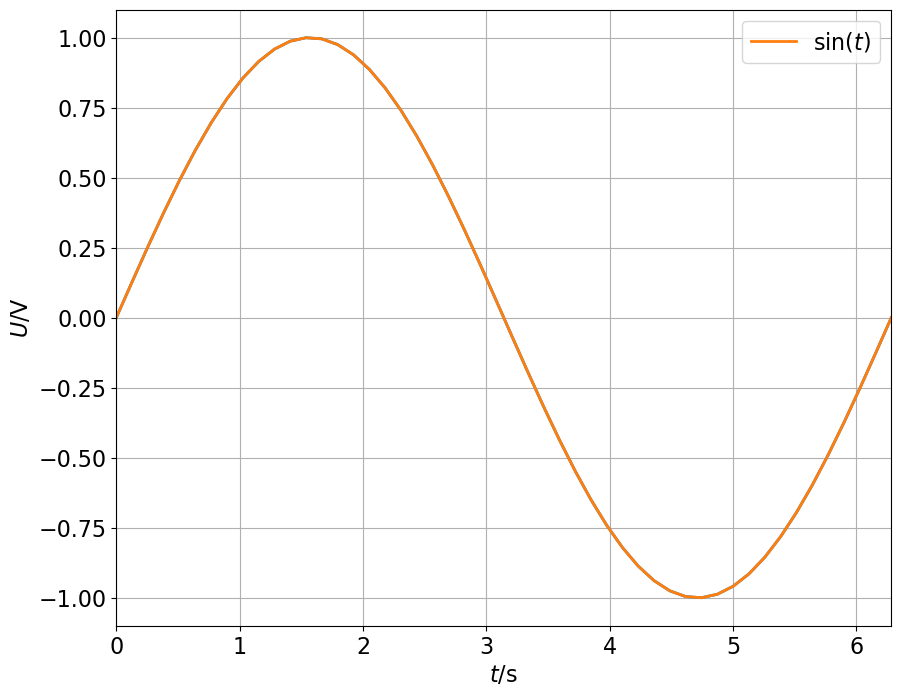

In [15]:
ax.grid()
# ax.grid(visible=None)
fig

# Achtung: Unterschied ax.grid() und ax.grid(True) bei mehrfachem Ausführen.
# Nur in Notebooks relevant, da Zellen potentiell mehrfach ausgeführt werden.
# Doku: If visible is None and there are no kwargs, this toggles the visibility of the lines.

## Laden von Daten

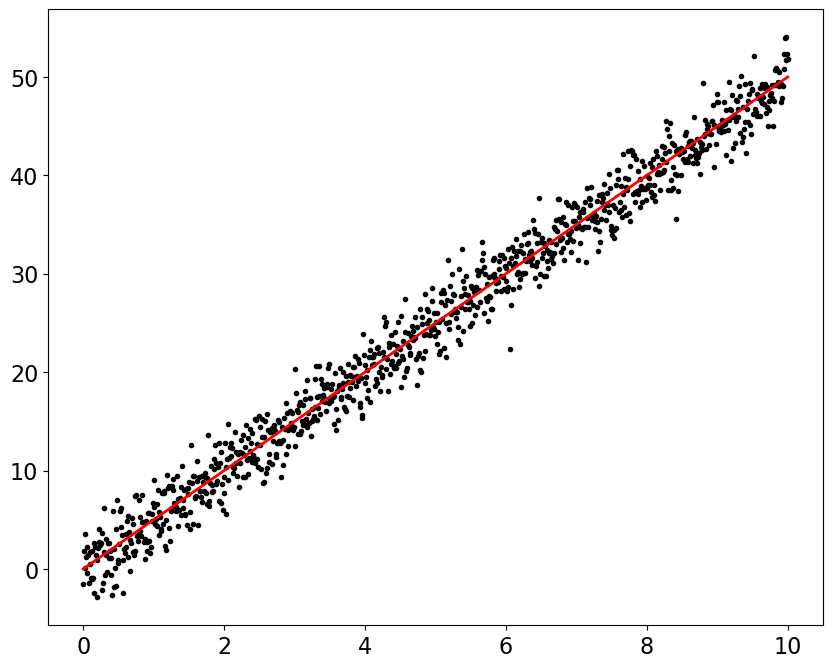

In [16]:
x, y = np.genfromtxt("data/example_data_linear.txt", unpack=True)

fig, ax = plt.subplots()
ax.plot(x, y, "k.")

t = np.linspace(0, 10)
ax.plot(t, 5 * t, "r-");

## Auslagern in ein Skript
Speicher den folgenden Code in eine Textdatei `plot.py` ab.

Öffne ein Terminal und starte das `python`-script mit:
    
    python plot.py

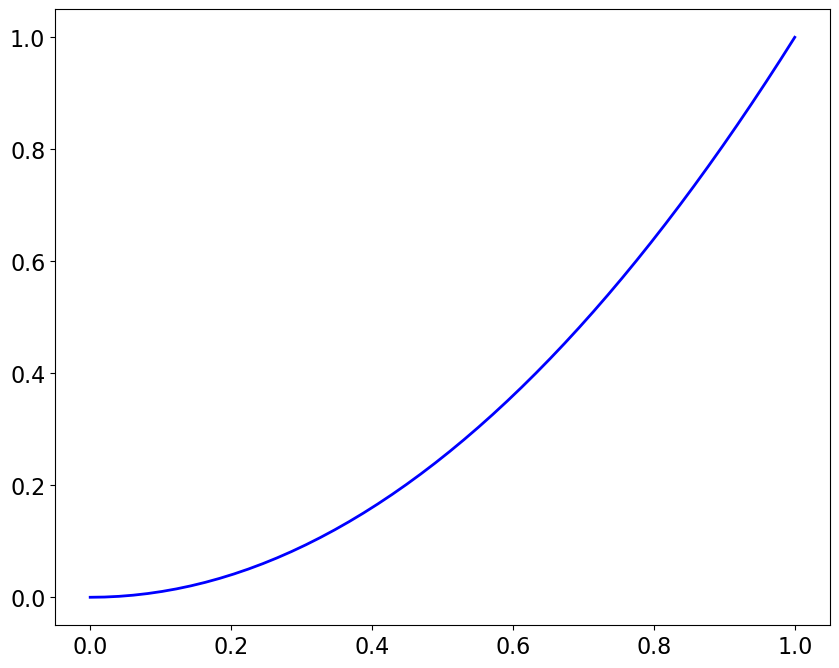

In [17]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 1)
fig, ax = plt.subplots()

ax.plot(x, x**2, "b-")
fig.savefig("plot.pdf")

Mit `savefig` speichert man die Abbildung. Dies ist eine Funktion der `figure` und nicht der `axes`.

In diesem Fall sollte die Datei `plot.pdf` erstellt worden sein.

Es gibt viele Ausgabeformate: `pdf`, `png`, `svg`, LaTeX, ...

Um mehrere Plots in einem script erstellen und speichern zu können, kann man `ax.cla()` verwenden.
Der Befehl leert die aktuell aktiv genutzte `axes`-Umgebung und steht für `clear axis`.

Der Befehl `fig.clf()` leert die gesamte `figure` und man muss erst ein neues Objekt `ax` erstellen (z.B. mit `fig.add_subplots()`), bevor man wieder etwas plotten kann.

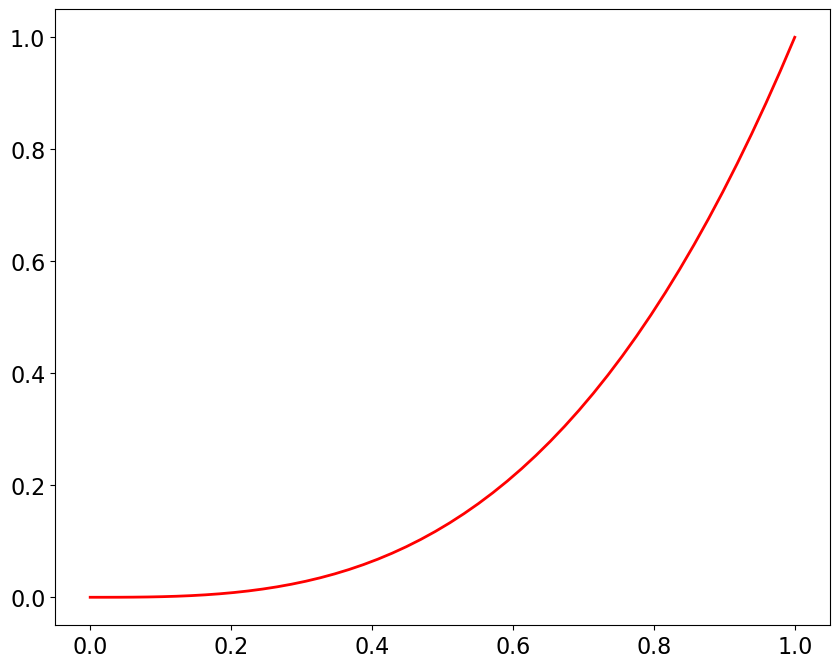

In [18]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 1)

### Plot 1
fig, ax = plt.subplots()

ax.plot(x, x**2, "b-", label="Plot 1")
ax.legend()
fig.savefig("plot_1.pdf")

### Plot 2
ax.cla()

ax.plot(x, x**3, "r-")
fig.savefig("plot_2.pdf");

Alternativ kann man auch mehrere `fig` und `axes` Objekte parallel nutzen:

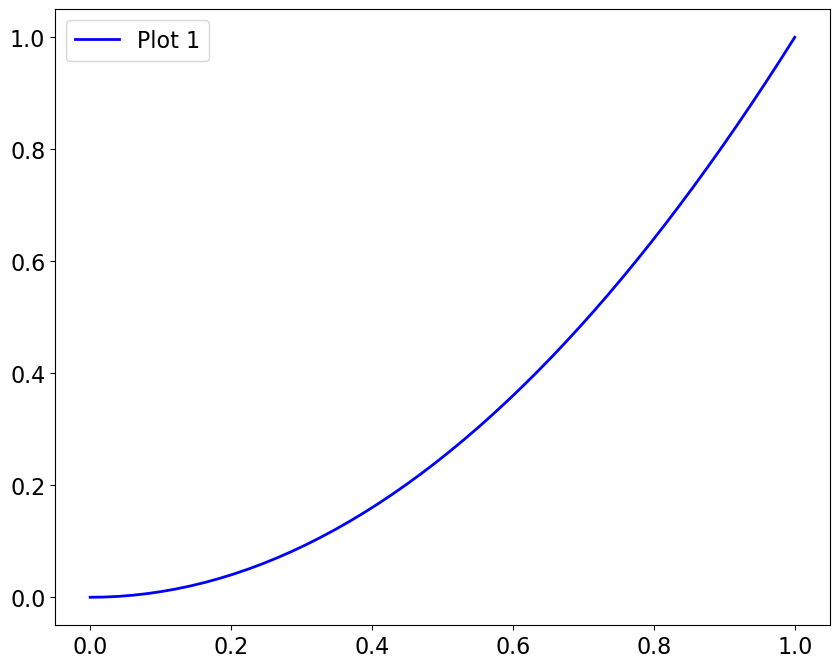

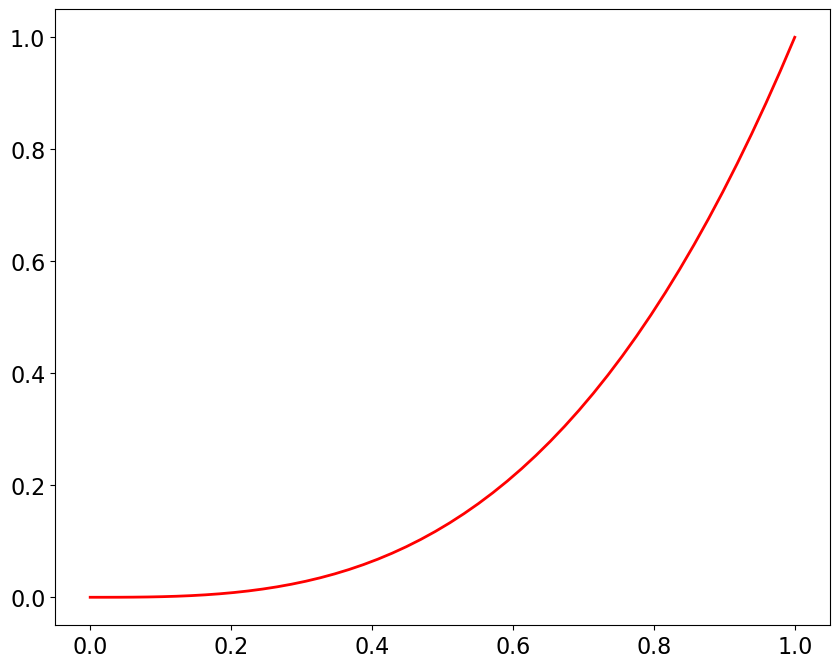

In [19]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 1)

### Plot 1
fig1, ax1 = plt.subplots()

ax1.plot(x, x**2, "b-", label="Plot 1")
ax1.legend()
fig1.savefig("plot_1.pdf")

### Plot 2
fig2, ax2 = plt.subplots()

ax2.plot(x, x**3, "r-")
fig2.savefig("plot_2.pdf");

## Komplexere Abbildungen
Natürlich kann man mehrere Linien in einen Plot packen:

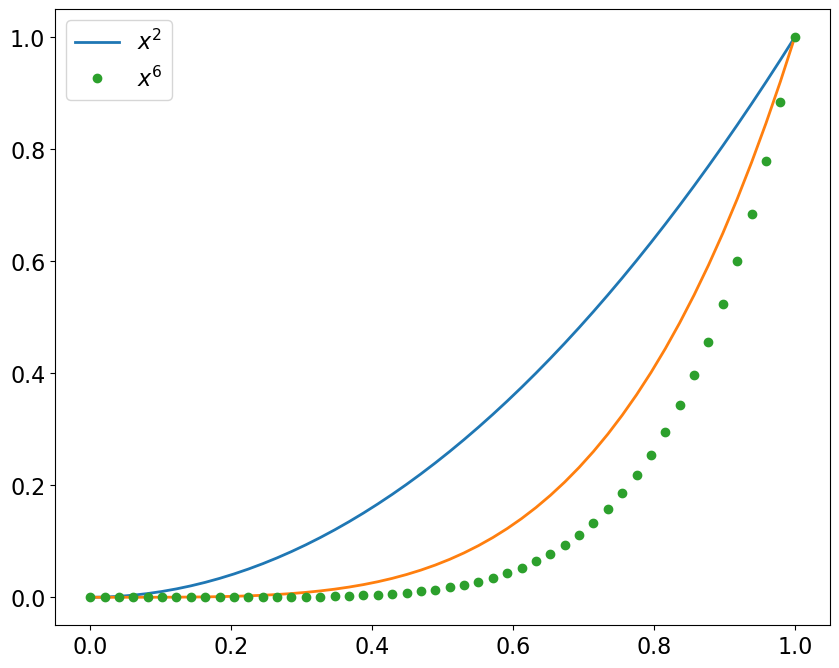

In [20]:
x = np.linspace(0, 1)

ax.cla()

ax.plot(x, x**2, label=r"$x^2$")
ax.plot(x, x**4)
ax.plot(x, x**6, "o", label=r"$x^6$")

ax.legend()
fig

Es werden nur die Plots in der Legende angezeigt, die ein Label haben.

### Mehrere Plots in einer Grafik
Man kann auch mehrere Plots in ein Bild packen:

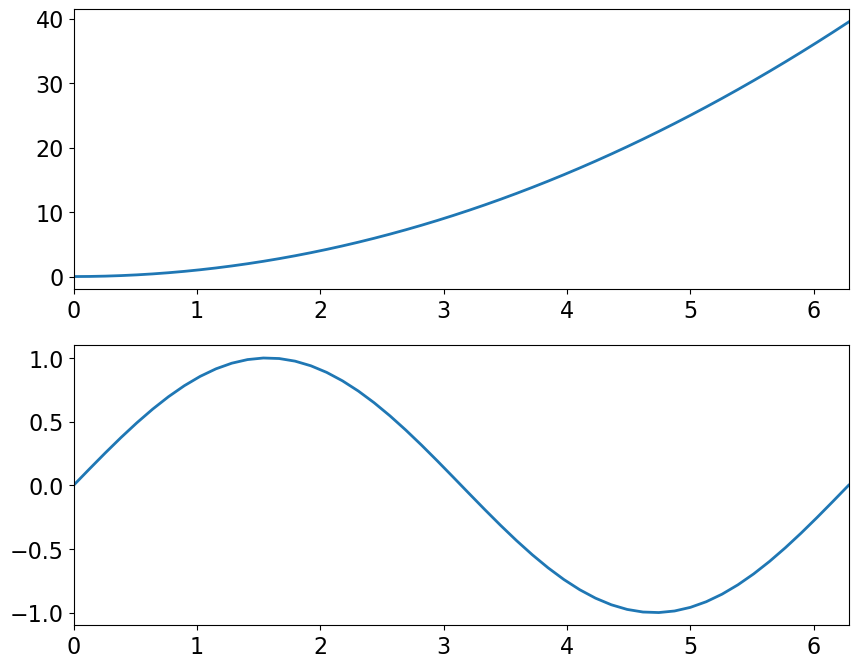

In [21]:
x = np.linspace(0, 2 * np.pi)

# rows, #columns, #position for add_subplot
fig, (ax1, ax2) = plt.subplots(2, 1)
# ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(x, x**2)
ax1.set_xlim(0, 2 * np.pi)

# ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(x, np.sin(x))
ax2.set_xlim(0, 2 * np.pi);

Dies führt manchmal zu Spacing-Problemen und Teilen die sich überschneiden.

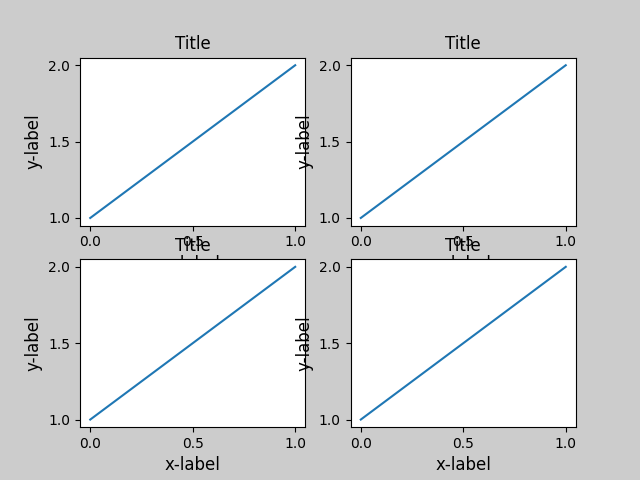

In [22]:
# https://matplotlib.org/stable/_images/sphx_glr_tight_layout_guide_003.png
Image(filename="images/tight_layout_guide.png")

Lösung: `layout="constrained"`

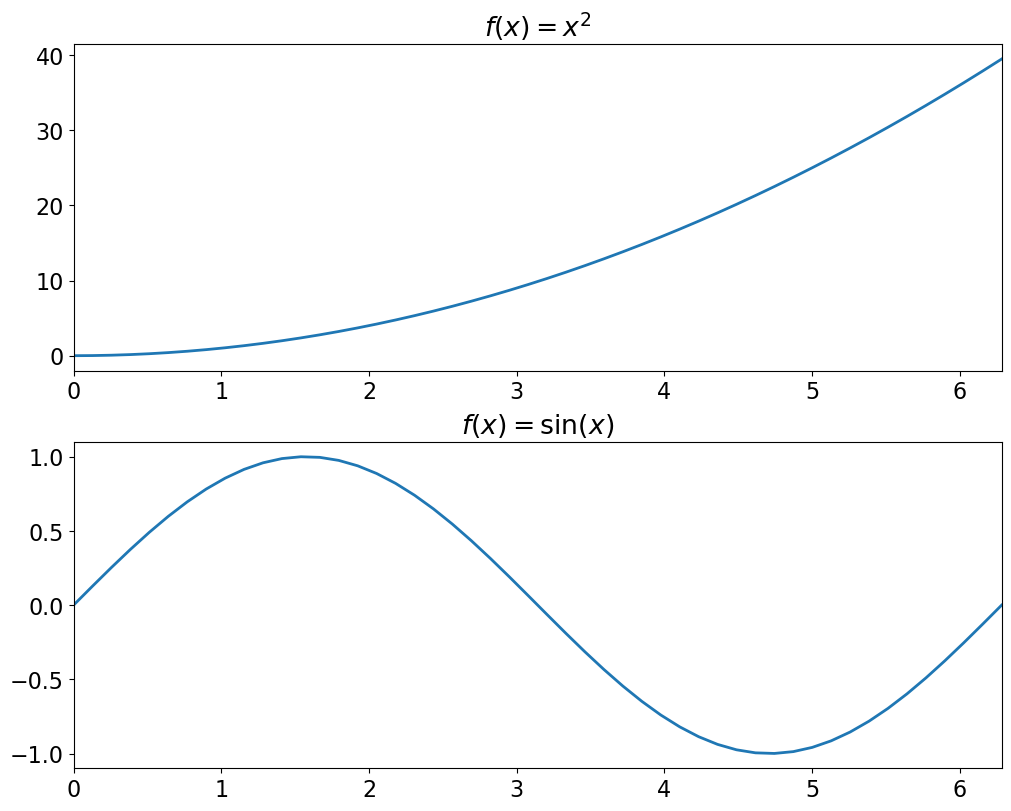

In [23]:
x = np.linspace(0, 2 * np.pi)

# Anzahl Zeile, Anzahl Spalten
fig, (ax1, ax2) = plt.subplots(2, 1, layout="constrained")

ax1.plot(x, x**2)
ax1.set_xlim(0, 2 * np.pi)
ax1.set_title(r"$f(x)=x^2$")

ax2.plot(x, np.sin(x))
ax2.set_xlim(0, 2 * np.pi)
ax2.set_title(r"$f(x)=\sin(x)$");

### Plot im Plot:

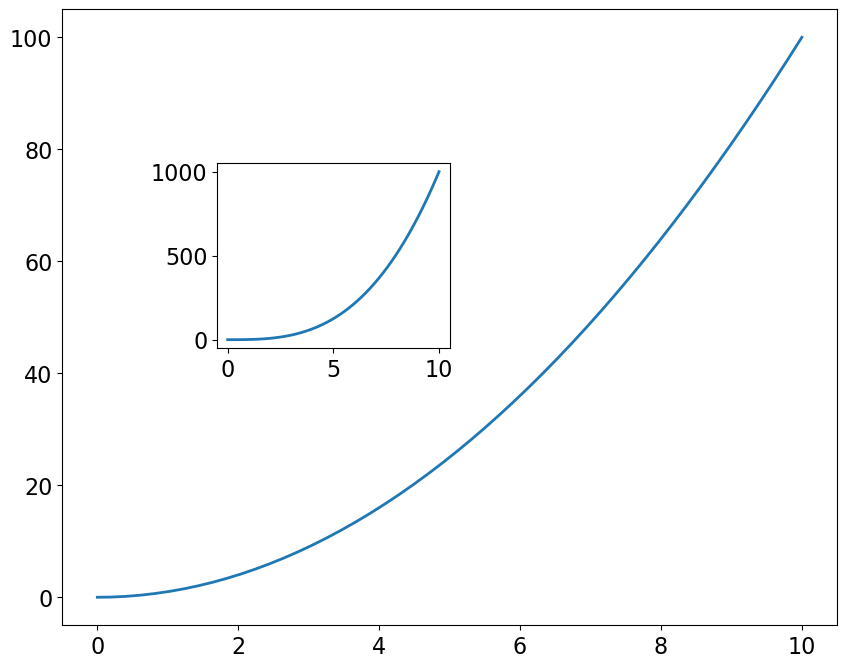

In [24]:
x = np.linspace(0, 10)

fig, ax = plt.subplots()
ax.plot(x, x**2)

# Koordinaten relativ zum Plot (0,0) links unten (1,1) rechts oben
# [x-location, y-location, x-length, y-length]
subax1 = ax.inset_axes([0.2, 0.45, 0.3, 0.3])

subax1.plot(x, x**3);

### Plots mit Fehlerbalken
Sehr häufig werden im Praktikum Plots mit Fehlerbalken benötigt, hier erzeugen wir einfach zufällige Fehlerbalken:

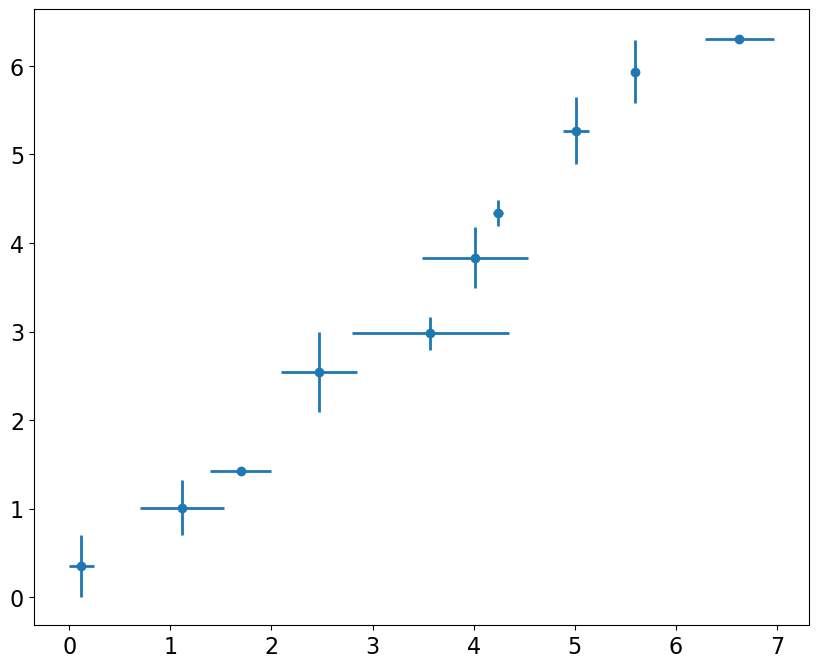

In [25]:
x = np.linspace(0, 2 * np.pi, 10)

rng = np.random.default_rng(42)

errX = 0.4 * abs(rng.standard_normal(len(x)))
errY = 0.4 * abs(rng.standard_normal(len(x)))

fig, ax = plt.subplots()

ax.errorbar(x + errX, x + errY, xerr=errX, yerr=errY, fmt="o");

### Achsen-Skalierung
Logarithmische (oder auch andere) Skalierung der Achsen ist auch möglich:

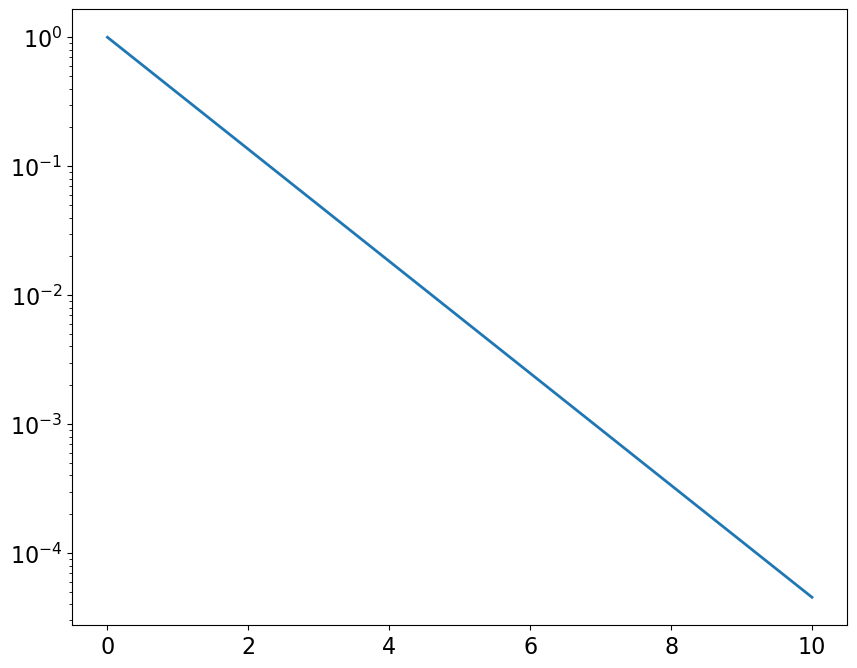

In [26]:
x = np.linspace(0, 10)

ax.cla()

ax.plot(x, np.exp(-x))
ax.set_yscale("log")
# ax.set_xscale('log')
fig

### Polar-Plot
Manchmal braucht man einfach einen Polarplot:

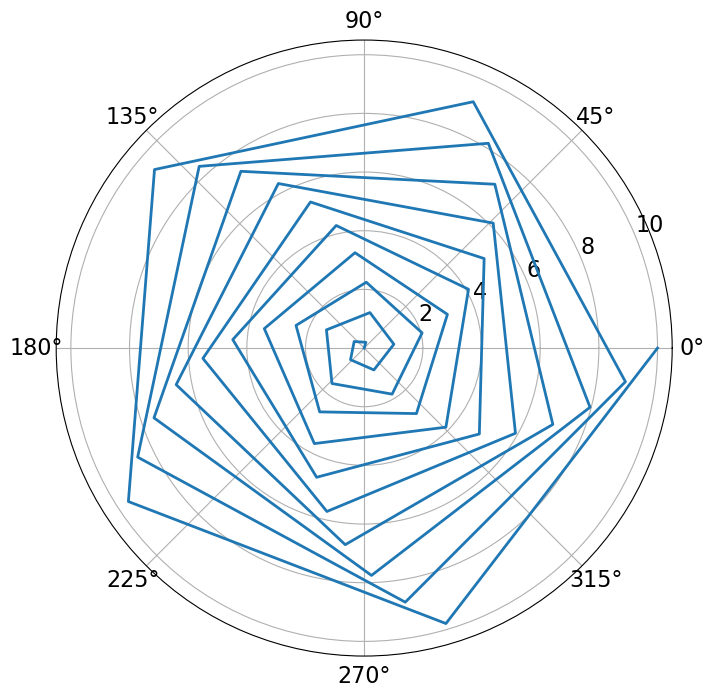

In [27]:
# r = np.linspace(0, 10, 1000)
r = np.linspace(0, 10, 50)
theta = 2 * np.pi * r


fig, ax = plt.subplots(subplot_kw={"projection": "polar"})
ax.plot(theta, r);

# Ticks
Man kann sehr viele Sachen mit Ticks machen…

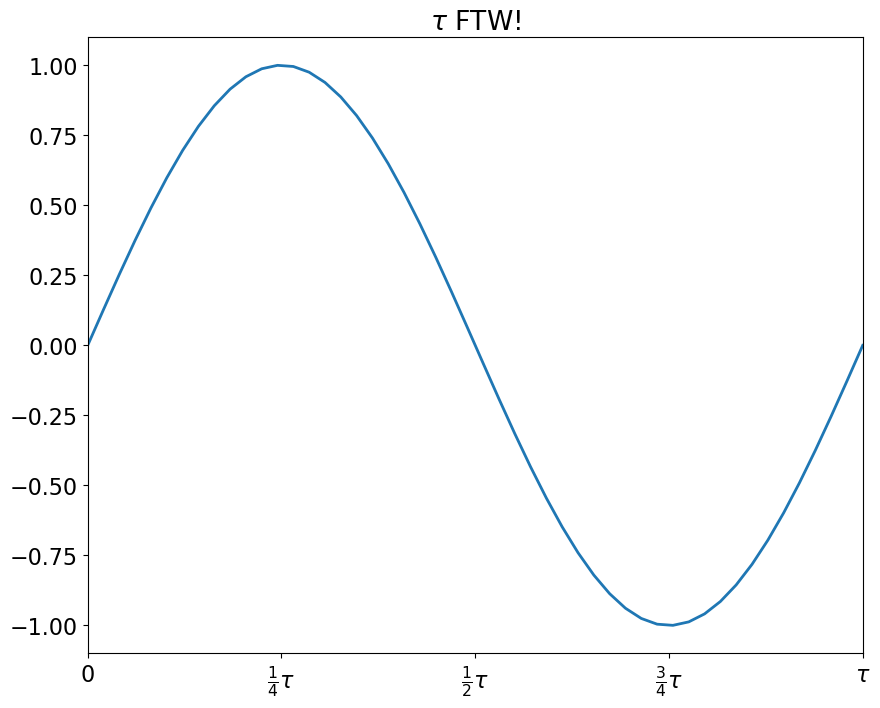

In [28]:
x = np.linspace(0, 2 * np.pi)

fig, ax = plt.subplots()

ax.plot(x, np.sin(x))
ax.set_xlim(0, 2 * np.pi)
# erste Liste: Tick-Positionen, zweite Liste: Tick-Beschriftung
ax.set_xticks(
    [0, np.pi / 2, np.pi, 3 * np.pi / 2, 2 * np.pi],
    [
        r"$0$",
        r"$\frac{1}{4}\tau$",
        r"$\frac{1}{2}\tau$",
        r"$\frac{3}{4}\tau$",
        r"$\tau$",
    ],
)
ax.set_title(r"$\tau$ FTW!");

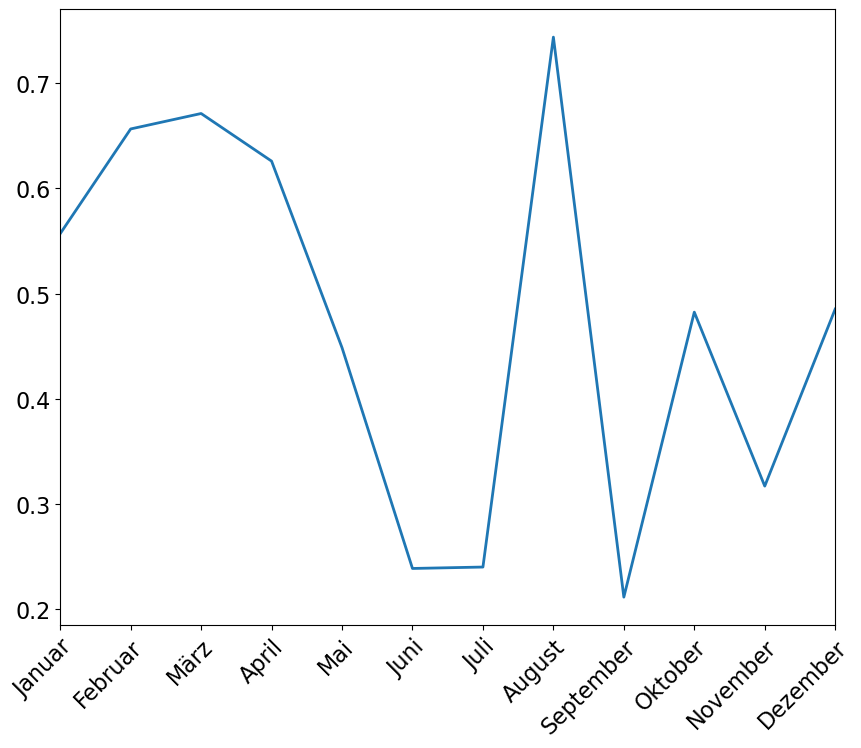

In [29]:
months = [
    "Januar",
    "Februar",
    "März",
    "April",
    "Mai",
    "Juni",
    "Juli",
    "August",
    "September",
    "Oktober",
    "November",
    "Dezember",
]

ax.cla()

ax.plot(np.arange(12), np.random.random(12))
ax.set_xticks(
    np.arange(12), months, rotation=45, rotation_mode="anchor", ha="right", va="top"
)
ax.set_xlim(0, 11)
fig

# Histogramme
Sehr häufig braucht man Histogramme.

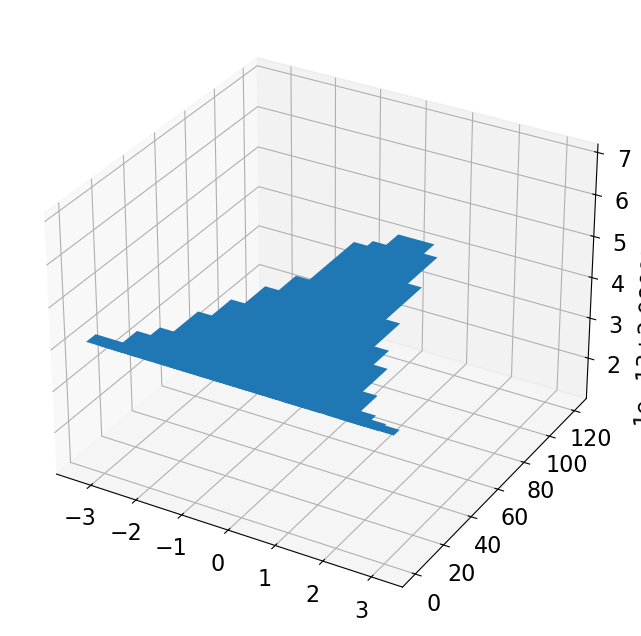

In [33]:
# Zufallsdaten generieren:
x = rng.normal(0, 1, 1000)

ax.cla()
ax.hist(x, bins=20)
# try histtype='step'
fig

# Nicht-Objektorientiertes Plotten
Bis jetzt haben wir die ausführliche, objektorientierte Variante von matplotlib benutzt.
Es git auch die "schnelle" Variante mit der einfacheren `pyplot`-Syntax. Wenn man viele Plots anlegt, ist der objekt-orientierte Ansatz für matplotlib allerdings meist besser geeignet.

Die Schreibweise `plt.plot` zeigen wir hier einmal der Vollständig halber und damit auf Stack Overflow oder ähnlichen Seiten keine Verwirrung entsteht.
Es besteht eigentlich kein wirklicher Grund, diese Schreibweise aktiv zu nutzen.

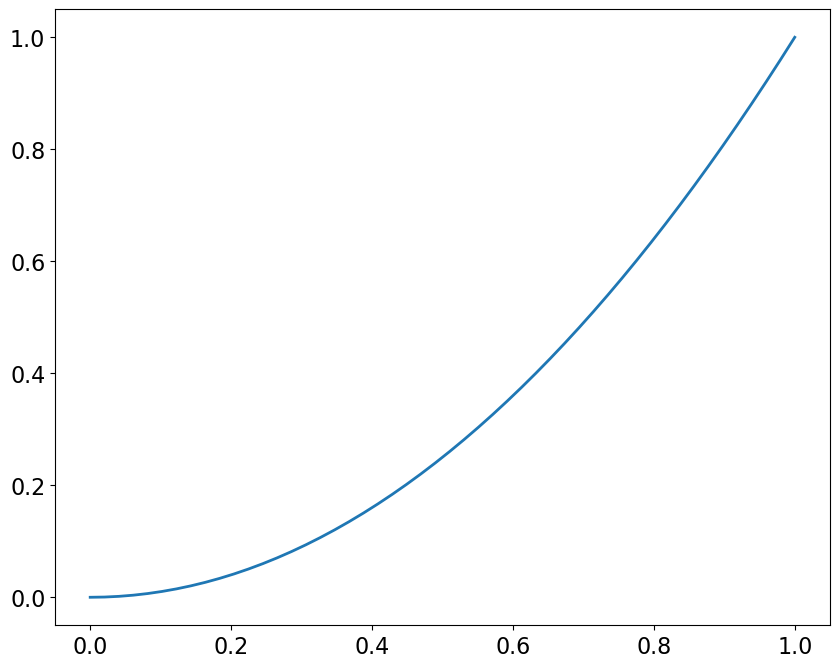

In [31]:
x = np.linspace(0, 1)  # gibt 50 Zahlen in gleichmäßigem Abstand von 0–1
plt.plot(x, x**2);
# Falls nicht interaktiv:
# plt.show()

# 3D Plots

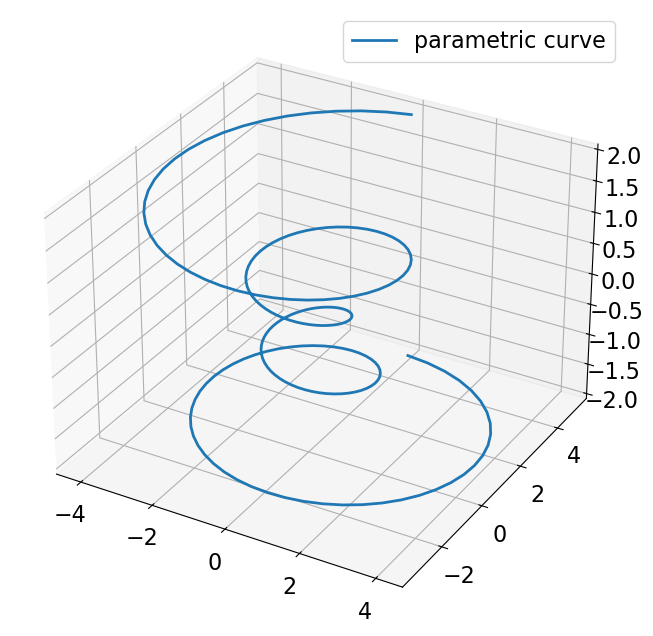

In [32]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(projection="3d")

theta = np.linspace(-4 * np.pi, 4 * np.pi, 200)
z = np.linspace(-2, 2, 200)

r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)

ax.plot(x, y, z, label="parametric curve")
ax.legend();

Weitere Beispiele zum 3dim Plotten findest du hier:

https://matplotlib.org/stable/gallery/mplot3d/index.html

# LaTeX
Es ist auch möglich LaTeX für das Setzen aller Plot-Beschriftungen (d.h. Achsenbeschriftungen, Ticks, Legenden, usw.) zu verwenden. Schau dir dazu die "TeX in matplotlib" Folien, im LaTeX-Foliensatz an.